Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = "me myself and i"

---

In [2]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
import warnings
import scipy
%matplotlib inline
import scipy
from scipy.optimize import brentq


# HW 2:  Root Finding and Optimization

## Question 1 - Fun with Fixed Point iteration

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  Consider the function 

$$
    f(x) = x^2 - M
$$

which has a positive root at at $x=\sqrt{M}$.   Here we will try to solve this using  fixed point iteration

$$
    x_{k+1} = g(x_k)
$$
for several different iteration functions $g(x)$ (see below)

For each function $g$:

- Confirm analytically that $x=\sqrt{M}$ is a fixed point of $g(x)$
- Analyze the convergence behavior close to the fixed-point *for all values* of $\sqrt{M}$ and determine the stability of the iterative scheme
- Now set $M=3$  and $x_0 = 2$.  Make a nicely labeled convergence plot showing the log of the relative error as a function of iteration number.  If the solution converges: 
    * Describe the convergence rate (linear, quadratic, etc)
    * How many iterations are required to reduce the relative error to machine precision?


**Remember**: if you want to write $g^\prime$, remember to use `g^\prime` rather than `g'` in $\LaTeX$ (otherwise nbgrader gets very unhappy)

**(a)** [4] To help with the last part,  write a short python function to return N iterations of a fixed point iteration.

In [3]:
def fixed_point(g, x0, N=5):
    """conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    :Input:
        - *g* (function) - The iteration function
        - *x_0* (float) - Initial guess
        - *N* (int) - number of terms in iteration
     
    :Output:
        x: numpy array (float)
            array containing the iterations [ x0, x1, ... x_N ]
    """
    x = numpy.empty(N+1)
    x[0] = x0
    for i in range(1,N+1):
        x[i] = g(x[i-1])
    return x    
# # YOUR CODE HERE
# raise NotImplementedError()

In [4]:
# Testing Cell

N = 5
g = lambda x: numpy.cos(x)
x0 = 1.
answer = numpy.array([1., 0.54030231, 0.85755322, 0.65428979, 0.79348036, 0.70136877])

x = fixed_point(g, x0, N )
numpy.testing.assert_allclose(x, answer)
print('success: passed N=5 test')

x_true = 0.7390851332153119
x = fixed_point(g, x0, 1000)
numpy.testing.assert_almost_equal(x[-1],x_true)
print('success: passed N=1000 test')

success: passed N=5 test
success: passed N=1000 test


**(b)** [6] analyze the problem with 
$$ g(x) = 1 + x - \frac{x^2}{M}$$

First, substitute $sqrt(M)$ into $g(x)$ and then we can get:
$$
g(\sqrt(M)) = 1 + \sqrt(M) - \frac{M}{M} = \sqrt(M)
$$
Also, taking the $g^\prime$, substitute sqrt(M) into it, and take absolute value of it, then we can get:
$$
g^\prime(\sqrt(M)) = 1 - \frac{2x}{M} = \mid1 - \frac{2}{\sqrt(M)}\mid
$$
We can know that when M goes from 0 to 1, $\mid g^\prime(\sqrt(M))\mid$ is larger than 1 which is divergent

We can say that after 19 iterations the function starts to reduce the relative error to machine precision

19


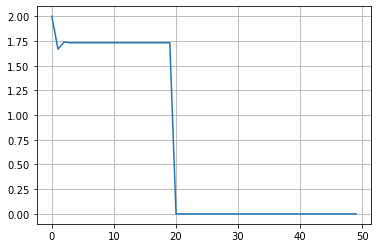

In [5]:
# Place plotting code here if needed
def fixed_point(g, x0, N):
    x = numpy.empty(N+1)
    x[0] = x0
    eps = numpy.finfo(float).eps
    for i in range(1,N+1):
        x[i] = g(x[i-1])
        if abs(numpy.sqrt(M)-x[i]) <= eps:
            print(i) # precision number of precision and break
            break
    return x  
M = 3
x0 = 2.
g = lambda x: 1 + x - x**2/M
k = lambda x: x

x = range(50)

y = fixed_point(g,x0,N=49)
plt.plot(x,y)
plt.grid()

# # YOUR CODE HERE
# raise NotImplementedError()

 **(c)** [6] analyze the problem with 
$$ g(x) = \frac{M}{x}$$

this will not converge sicne we can easily find that the function runs between somewhere near 1.5 and somewhere near 2.9

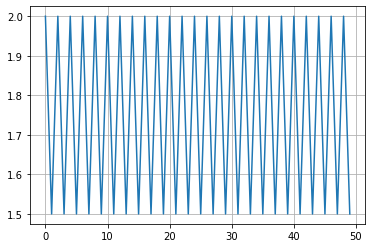

In [6]:
# Place plotting code here if needed

# # YOUR CODE HERE
# raise NotImplementedError()
def fixed_point(g, x0, N):
    x = numpy.empty(N+1)
    x[0] = x0
    eps = numpy.finfo(float).eps
    for i in range(1,N+1):
        x[i] = g(x[i-1])
        if abs(numpy.sqrt(M)-x[i]) <= eps:
            print(i) # precision number of precision and break
            break
    return x  
M = 3
x0 = 2.
g = lambda x: 3/x
k = lambda x: x

x = range(50)

y = fixed_point(g,x0,N=49)
plt.plot(x,y)
plt.grid()


**(d)** [6] Newton's method
$$ g(x) = x - \frac{f}{f^\prime}$$

with $$ f = x^2 - M$$

First, substitute $sqrt(M)$ into $g(x)$ and then we can get:
$$
g(\sqrt(M)) = \sqrt(M) - \frac{\sqrt(M)^2-M}{2*\sqrt(M)} = \sqrt(M)
$$
Also, taking the $g^\prime$, substitute sqrt(M) into it, and take absolute value of it, then we can get:
$$
g^\prime(\sqrt(M)) = \frac{1}{2} - \frac{M}{2x^2} = \frac{1}{2} - \frac{1}{2}
$$
We can know that $g^\prime$is smaller than 1, which is convergent

we can know after 4 iterations the function will converge to $\sqrt(3)$ and the relative error has been reduced to machine precision

4


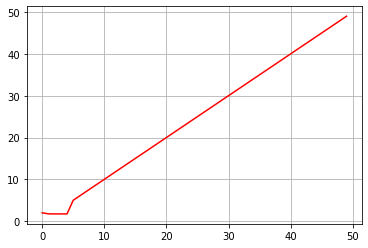

In [7]:
# Place plotting code here if needed

# # YOUR CODE HERE
# raise NotImplementedError()
def fixed_point(g, x0, N):
    x = numpy.empty(N+1)
    x[0] = x0
    eps = numpy.finfo(float).eps
    for i in range(1,N+1):
        x[i] = g(x[i-1])
        if abs(numpy.sqrt(M)-x[i]) <= eps:
            print(i) # precision number of precision and break
            break
    return x  
M = 3
x0 = 2.
g = lambda x: x - ((x**2 - 3) / (2*x))
k = lambda x: x

x = range(50)

y = fixed_point(g,x0,N=49)
plt.plot(x,y,'r')
plt.grid()

## Question 2 - Fun with Rootfinders and NewtSafe

This problem will explore the behavior of a range of different rootfinding routines against  a more challenging rootfinding problem.  Feel free to use any or all  of the routines presented in class which have been included in an auxiliary python file `rootfinding_optimization_schemes.py`


You need to have this file in the same directory with your homework for this notebook to import it.

In [8]:
#  Cell to import and test at least newton's method from class
%run rootfinding_optimization_schemes.py
from  rootfinding_optimization_schemes import newton

# set test function and its derivative
f = lambda x: numpy.cos(x) - x
f_prime = lambda x: -numpy.sin(x) - 1.

#set initial guess and call newton
x0 = 1.
x, x_array = newton(f, f_prime, x0,tol=1.e-12)

# run tests
answer = 0.7390851332151606
N = 5
numpy.testing.assert_almost_equal(x, answer)
numpy.testing.assert_almost_equal(N, len(x_array))
print("functions loaded correctly")

functions loaded correctly


<Figure size 432x288 with 0 Axes>

Consider the function 

$$
    f(x) = \cos(x) +  N(x, A, \alpha, \beta))
$$
where

$$
    N(x, A, \alpha, \beta) =  A\left[\sin(\alpha x) + \sin(\beta x)\right]
$$

is a function that adds smooth additive "noise" with fixed amplitude $A = 0.05$ and varying frequencies $\alpha$ and $\beta$

**(a)** [4] Make a nicely labeled plot to showing the behavior of this function for 
* $\alpha = 0.$, $\beta =0.$
* $\alpha = 4.$, $\beta =5.$
* $\alpha = 27$, $\beta = 50$

over the domain $x\in[-2\pi, 2\pi]$. Make sure you have enough points to resolve the wiggles.  You should plot all three curves on the same plot

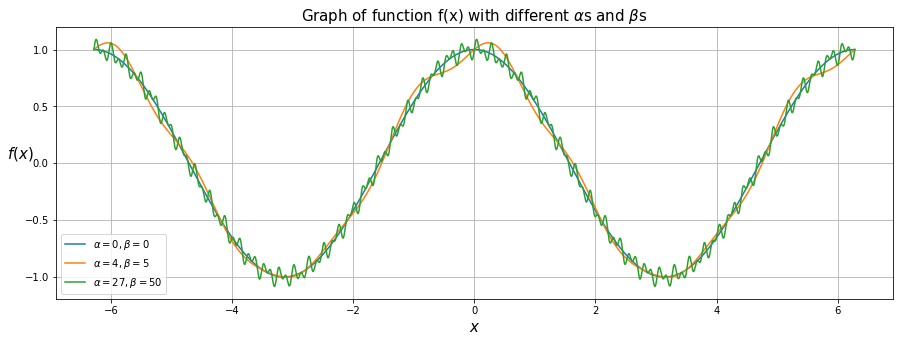

In [9]:
x = numpy.linspace(-2 * numpy.pi,2 * numpy.pi,1000001)
A = 0.05


f1 = numpy.cos(x) + A * numpy.sin(0. * x) + A * numpy.sin(0. * x)
f2 = numpy.cos(x) + A * numpy.sin(4. * x) + A * numpy.sin(5. * x)
f3 = numpy.cos(x) + A * numpy.sin(27 * x) + A * numpy.sin(50 * x)

fig = plt.figure(figsize = (15,5))
axes = fig.add_subplot(1,1,1)
plt.plot(x,f1,label = r'$\alpha = 0, \beta = 0$')
plt.plot(x,f2,label = r'$\alpha = 4, \beta = 5$')
plt.plot(x,f3,label = r'$\alpha = 27, \beta = 50$')
plt.title(r'Graph of function f(x) with different $\alpha$s and $\beta$s', fontsize =15)
plt.xlabel('$x$', fontsize =15)
plt.ylabel('$f(x)$', rotation=0, fontsize =15)
plt.legend(loc='best')
plt.grid()

## YOUR CODE HERE
# raise NotImplementedError()

**(b)** [4] Explore the behavior of the following rootfinding routines 
* bisection
* newton
* secant
* brentq method using scipy.optimize.root_scalar
* **EXTRA CREDIT** any other method used in root_scalar

for finding a root of this function, given the bracket $x\in[x_0, x_1]$ with $x_0 = 0.2$, $x_1 = 2.$ for each ($\alpha, \beta$) pair

`params = [ (0., 0.), (4., 5.),  (27, 50.) ]`

For each routine,  report
* the root found $x^*$
* the value of $f$ at the root $f(x^*$)
* the number of iterations.

In [10]:
# Bisection

x = numpy.linspace(0.2, 2, 1000)
params = [ (0., 0.), (4., 5.), (27, 50.) ]
a = 0.2
b = 2
A = 0.05

for p in params:
    f = lambda x,a=a,b=b: numpy.cos(x) + A * numpy.sin(p[0] * x) + A * numpy.sin(p[1] * x)
    r_star, r_array = bisection(f, a, b, tol=1e-8)
    print('root at r = {}, f(r*) = {}, {} steps'.format(r_star,f(r_star),len(r_array)))

# # YOUR CODE HERE
# raise NotImplementedError()

root at r = 1.5707963198423385, f(r*) = 6.952558146037445e-09, 26 steps
root at r = 1.6304407358169555, f(r*) = 7.952243745446008e-09, 23 steps
root at r = 1.5567201036959886, f(r*) = -6.491353149451484e-10, 29 steps


In [11]:
# Newton
x = numpy.linspace(0.2, 2, 1000)
params = [ (0., 0.), (4., 5.), (27, 50.) ]
a = 0.2
b = 2
A = 0.05

for p in params:
    f = lambda x: numpy.cos(x) + A * numpy.sin(p[0] * x) + A * numpy.sin(p[1] * x)
    f_prime = lambda x: -numpy.sin(x) + A * p[0] * numpy.cos(p[0] * x) + A * p[1] * numpy.cos(p[1] * x)
    r_star, r_array = newton(f, f_prime,a, tol = 1.e-6, max_steps=1000)
    print('root at r = {}, f(r*) = {}, {} steps'.format(r_star,f(r_star),len(r_array)))


root at r = 4.71238898038469, f(r*) = -1.8369701987210297e-16, 5 steps
root at r = -14.096326236971352, f(r*) = 6.931560738582254e-08, 5 steps
root at r = 7.839905532640377, f(r*) = -4.1546196562908255e-07, 18 steps


In [12]:
# Secant
x = numpy.linspace(0.2, 2, 1000)
params = [ (0., 0.), (4., 5.), (27, 50.) ]
a = 0.2
b = 2
A = 0.05

for p in params:
    f = lambda x,a=a,b=b: numpy.cos(x) + A * numpy.sin(p[0] * x) + A * numpy.sin(p[1] * x)
    r_star, r_array = secant(f,a,b,tol = 1.e-6, max_steps=1000)
    print('root at r = {}, f(r*) = {}, {} steps'.format(r_star,f(r_star),len(r_array)))


root at r = 1.5707963267998242, f(r*) = -4.927552640156338e-12, 6 steps
root at r = 1.6304406749277849, f(r*) = 6.137287288099369e-08, 7 steps
root at r = 1.5567201023472799, f(r*) = 3.9454700617724825e-09, 9 steps


In [13]:
# Brentq
import scipy
from scipy.optimize import brentq

x = numpy.linspace(0.2, 2, 1000)
params = [ (0., 0.), (4., 5.), (27, 50.) ]
a = 0.2
b = 2
A = 0.05

for p in params:
    f = lambda x,a=a,b=b: numpy.cos(x) + A * numpy.sin(p[0] * x) + A * numpy.sin(p[1] * x)
    r_star = scipy.optimize.brentq(f,a,b)
    print('root at r = {}, f(r*) = {}, {} steps'.format(r_star,f(r_star),len(r_array)))
    


root at r = 1.5707963267948966, f(r*) = 6.123233995736766e-17, 9 steps
root at r = 1.630440744880973, f(r*) = -2.983724378680108e-16, 9 steps
root at r = 1.5567201035054403, f(r*) = -3.191891195797325e-16, 9 steps


In [14]:
# Brenth (extra method)
import scipy
from scipy.optimize import brenth

x = numpy.linspace(0.2, 2, 1000)
params = [ (0., 0.), (4., 5.), (27, 50.) ]
a = 0.2
b = 2
A = 0.05

for p in params:
    f = lambda x,a=a,b=b: numpy.cos(x) + A * numpy.sin(p[0] * x) + A * numpy.sin(p[1] * x)
    r_star = scipy.optimize.brenth(f,a,b)
    print('root at r = {}, f(r*) = {}, {} steps'.format(r_star,f(r_star),len(r_array)))


root at r = 1.5707963267948966, f(r*) = 6.123233995736766e-17, 9 steps
root at r = 1.6304407448809728, f(r*) = -9.020562075079397e-17, 9 steps
root at r = 1.55672010350544, f(r*) = 4.510281037539698e-16, 9 steps


In [15]:
# Ridder (extra method)
import scipy
from scipy.optimize import ridder

x = numpy.linspace(0.2, 2, 1000)
params = [ (0., 0.), (4., 5.), (27, 50.) ]
a = 0.2
b = 2
A = 0.05

for p in params:
    f = lambda x,a=a,b=b: numpy.cos(x) + A * numpy.sin(p[0] * x) + A * numpy.sin(p[1] * x)
    r_star = scipy.optimize.ridder(f,a,b)
    print('root at r = {}, f(r*) = {}, {} steps'.format(r_star,f(r_star),len(r_array)))


root at r = 1.5707963267945357, f(r*) = 3.6088371534313326e-13, 9 steps
root at r = 1.630440744881973, f(r*) = -8.777145676930331e-13, 9 steps
root at r = 1.5567201035044596, f(r*) = 3.3408553701264054e-12, 9 steps


**(c)** [4] Make a convergence plot showing the relative error at each step for Newton's method for the same three parameter pairs and initial guess $x_0 = 0.2$.  Hint: your convergence plots should use `semilogy` for clearest results.  Again put all your results on one plot and label things well

In [16]:
def newton_cov(f, f_prime, x0, tol=1.e-6, max_steps=200):
    
    MAX_STEPS = max_steps
    
    x = x0
    x_array = [ x0 ]
    for k in range(1, MAX_STEPS + 1):
        x = x  - f(x) / f_prime(x)
        x_array.append(x)
        if numpy.abs(f(x)) < tol:
            break
        
    if k == MAX_STEPS:
        warnings.warn('Maximum number of steps exceeded')
    
    return numpy.array(x_array)

# # YOUR CODE HERE
# raise NotImplementedError()

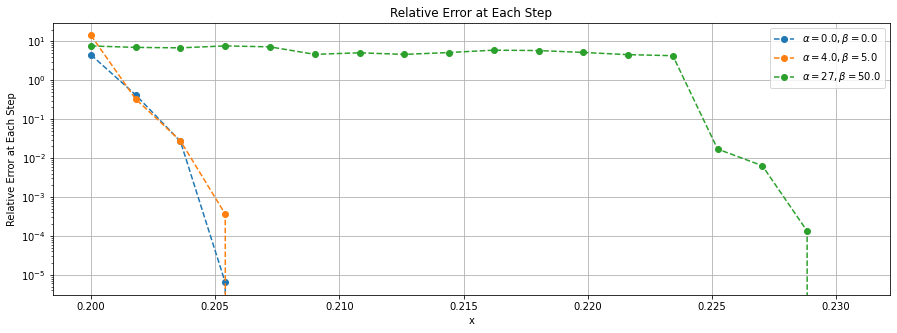

In [17]:

x = numpy.linspace(0.2, 2, 1000)
params = [ (0., 0.), (4., 5.), (27, 50.) ]
a = 0.2
b = 2
A = 0.05

fig = plt.figure(figsize = (15,5))
for p in params:
    x_plot = []
    
    f = lambda x,a=a,b=b: numpy.cos(x) + A * numpy.sin(p[0] * x) + A * numpy.sin(p[1] * x)
    f_prime = lambda x: -numpy.sin(x) + A * p[0] * numpy.cos(p[0] * x) + A * p[1] * numpy.cos(p[1] * x)
    
    r_array_cov = newton_cov(f, f_prime,a, tol = 1.e-6, max_steps=1000)
    r_star, r_array = newton(f, f_prime,a, tol = 1.e-6, max_steps=1000)
    
    for n in range(len(r_array)):
        x_plot.append(x[n])
    
    y_plot = abs(r_array-r_star)
    
    plt.semilogy(x_plot, y_plot, 'o', linestyle = 'dashed',label = r'$\alpha={}, \beta={}$'.format(p[0],p[1]))
plt.legend()
plt.title('Relative Error at Each Step')
plt.ylabel('Relative Error at Each Step')
plt.xlabel('x')
plt.grid()


**(d)** [4] Briefly explain your results so far for all the methods.  Feel free to play with other initial parameters or to make additional plots.  

**Answer to Question 2 (d)**

The function goes as:

$$
    f(x) = \cos(x) +  N(x, A, \alpha, \beta))
$$
where

$$
    N(x, A, \alpha, \beta) =  A\left[\sin(\alpha x) + \sin(\beta x)\right]
$$

Bisection method takes the most steps to reach the roots, Newton is the fastest to some degree(when it is able to get a root), then Secant is the second fastest method.

- Bisection
    - since these three functions all have negative and positive values and all are somehow decreasing, we can say that under this specific situation, Bisection method is very robust.

- Secant
    - Secant method takes the slope of two points on the curve instead of simply calculating the derivative, we can see from the results that under this specific condition, it is more robust than Newton's since our initial guess is not bad then Secant will lead us to a relatively reasonable answer in this case

- Brentq
    - Brent's method can be regarded as an advanced combination of bisection and Secant method. Since $f(0.2) * f(2) < 0$, the existance of a solution can then be guaranteed. Since we have a initial guess and contrapoint, after computing two provisional values by using linear interpolation(Secant method) and bisection method, we then can repeat the process

- Newton
    - $\alpha = 0.$ and $\beta = 0.$. When $x \in [0.2, 2]$, the function can be treated as a smooth monotonically decreasing function from the graph we already plotted, which means we dont have to consider the probability of the natural peaks in this $\sin(x)$ finction. So, the Newton's method will be efferctive since we did not take the 'noice' into consideration.
    - $\alpha = 4.$ and $\beta = 5.$. Newton's method has already lost its stability and returned a wrong output because even though $f(x)$ now is still a monotonically decreasing function but the derivative of it varies from positive and negative which will majorly influence the output.
    - $\alpha = 27.$ and $\beta = 50.$. We can tell from the graph that for now Newton's method will not be effective since the original function has been affected by 'noice' severely and we can not keep calculating the derivatives repeatly and hope to get the right answer by chance.

**(e)** [6] Write a controlled Newton routine `NewtSafe`,  that finds a root with an initial bracket by combining newton steps with a bisection routine.  The basic algorithm is to first try Newton from the midpoint of the bracket.  If Newton predicts a solution outside of the bracket, ignore it and take a bisection step instead.  You can use and modify any of the rootfinding routines I presented in class, but write a decent docstring and raise appropriate exceptions as necessary. 

The routine should return the best estimate of the root and number of Newton Steps and the number of bisection steps

`x, N_newt, N_bisection = newtsafe(f, f_prime, a, b)`

In [18]:
def newtsafe(f,f_prime,a,b,tol = 1.e-6, max_steps=1000):
    """ Please improve this docstring
        
    
    Parameters:
    -----------
    
    f: function (float)
        function returning f(x)
    f_prime:  function (float)
        function returning derivative of f with respect to x
    a: float
        left bracket a < x
    b: float
        right bracket x < b
        
        Note:  the signs of f(a) and f(b) must be different to insure a bracket
    tol: float
        tolerance.  Returns when |f(x)| < tol
    max_steps: int
        maximum number of iteration steps
        
    Returns:
    --------
    x: float
        midpoint of final bracket
    n_newt:  number of newton steps for successful newton iteration
    n_bisection: number of bisection steps
        
    Raises:
    -------
    ValueError:  
        if initial bracket is invalid 
    Warning: 
        if number of iterations exceed MAX_STEPS
    Prints warning if Newton exceeds the bracket
    
    """
    
    n_newt = 0
    n_bisection = 0
    c = ( a + b ) / 2
    x_array = [c]
    
    
    
    if numpy.sign(f(a)) == numpy.sign(f(b)):
        raise ValueError("no bracket: f(a) and f(b) must have different signs")
    
    for step in range(max_steps):
        if numpy.abs(f(c)) < tol:
            break
        
        x_newt = c - f(c) / f_prime(c)
        
        if x_newt > b or x_newt < a:
            n_bisection += 1
            if numpy.sign(f(a)) != numpy.sign(f(c)):
                b = c
                
            else:
                a = c
            x_newt = a + (b - a)/2.
        else:
            n_newt += 1
        c = x_newt
        x_array.append(c)
                
    
    if step == max_steps:
        warnings.warn('Maximum number of steps exceeded')
        
    return c, n_newt, n_bisection
    
# # YOUR CODE HERE
# raise NotImplementedError()


In [19]:
# you can play with your code here

In [20]:
# Testing Cell
from  rootfinding_optimization_schemes import newton
from scipy.optimize import root_scalar

a = 27
b = 50
A = 0.3
f = lambda x: numpy.cos(x) + A*(numpy.sin(a * x) + numpy.sin(b * x))
f_prime = lambda x: -numpy.sin(x) + A*(a*numpy.cos(a * x) + b*numpy.cos(b * x))

pi = numpy.pi

brackets = [ 
            (-0.68309670780092, 2.642524050776319),
            (-0.7104536143852529, 3.8152626763086603),
            (-0.5236057894835726, 3.9067882124238986),
            (-0.5275356434135271, 2.4988039593212776),
            (-0.3534683303763972, 3.9130408021252014)
           ]

for bracket in brackets:
    #a = numpy.random.uniform(low=-pi/4, high=pi/4)
    #b = numpy.random.uniform(low=3*pi/4, high=5*pi/4)
    a = bracket[0]
    b = bracket[1]
    x_n, x_array = newton(f, f_prime, (a + b)/2.)
    x_ns, N_n, N_b = newtsafe(f, f_prime, a, b)
    sol = root_scalar(f, bracket=(a, b),method='brentq')
    print('Bracket  = [{}, {}]'.format(a, b))
    print('Newton   = {},    N   = {}'.format(x_n, len(x_array)-1))
    print('NewtSafe = {},    N_n = {}, N_b = {}'.format(x_ns, N_n, N_b))
    print('brentq   = {},    N   = {}'.format(sol.root, sol.iterations))
    print()
    numpy.testing.assert_almost_equal(x_ns, sol.root,decimal=5)
    
try:
    x_ns, N_n, N_b = newtsafe(f, f_prime, 1.6, 2.0)
except ValueError as err:
    print(err)
    pass

print('success!')


Bracket  = [-0.68309670780092, 2.642524050776319]
Newton   = 1.27194847295657,    N   = 3
NewtSafe = 1.27194847295657,    N_n = 3, N_b = 0
brentq   = 1.2719484732512498,    N   = 9

Bracket  = [-0.7104536143852529, 3.8152626763086603]
Newton   = -23.8662065317763,    N   = 7
NewtSafe = 1.0884990113244402,    N_n = 3, N_b = 2
brentq   = 1.088499013515958,    N   = 13

Bracket  = [-0.5236057894835726, 3.9067882124238986]
Newton   = -10.863477689404652,    N   = 11
NewtSafe = 1.1106142646362411,    N_n = 5, N_b = 1
brentq   = 1.1106142646873127,    N   = 11

Bracket  = [-0.5275356434135271, 2.4988039593212776]
Newton   = 1.3248590962279085,    N   = 3
NewtSafe = 1.3248590962279085,    N_n = 3, N_b = 0
brentq   = 1.3248590968150393,    N   = 9

Bracket  = [-0.3534683303763972, 3.9130408021252014]
Newton   = 1.1473182519095415,    N   = 10
NewtSafe = 1.1473181573836526,    N_n = 6, N_b = 1
brentq   = 1.1473182519138232,    N   = 9

no bracket: f(a) and f(b) must have different signs
success

## Question 3 - Solve a "real" rootfinding problem

In Homework 2, I asked you to *estimate* the number of terms in the taylor expansion of $e^x$ such that the relative error was less than $\epsilon_{mach}$.  This was essentially a non-linear problem in the number of steps $n$.  Here we will use a rootfinder to get this number more precisely.

**(a)** [8] provide a numerical solution for the number of terms $n$ in the Taylor polynomial expansion of exp(x) (i.e. $T_N(x))$ such that the relative error is

$$
    r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 

Give solutions for x = 0.1, 1., 10. ,100. , 709., 1000. and compare your numerical solution to the approximate solution given in last homework 

$$
    n > e*x
$$

by calculating the relative error between the your numerical solution and your simpler estimate.

Note: To make this problem easier, just use Stirling’s approximation $\log(n!) \approx n \log n − n$. which will work quite well.  However, for a little bit of extra credit solve this for the full problem and compare solutions.


**Asnwer to Question 3 (a)**


Since 
$$
r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$

Then we can get:
$$
x^{n+1} = \epsilon_{mach} * (n+1)!
$$

we take log of both side and get:
$$
\begin{aligned}
(n+1)log(x) &= log(\epsilon_{mach}) + log((n+1)!)\\
&= log(\epsilon_{mach}) + (n+1)log(n+1)-(n+1)
\end{aligned}
$$

So we have equation below:
$$
0 = (n+1)log(x) - log(\epsilon_{mach}) - (n+1)log(n+1) + (n+1)
$$

In [21]:
# approximate solution from last hw(which is obviously nonideal)

# import the factorial function from scipy
from scipy.special import factorial

def Tn_exp(x):
    """ Write a decent description here
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """

    assert(isinstance(x,float))
    eps = numpy.finfo(float).eps
    
    T_n = 1.0
    MAX_N = int(20 + int(abs(x) * 3))
    
    use_inv = False
    if x<0:
        x = abs(x) 
        use_inv = True
    
    for n in numpy.arange(MAX_N,0,-1):
        T_n = T_n * x / n + 1.
    
    if use_inv:
        T_n = 1./T_n
    
    Tn = T_n

    return Tn, MAX_N
x_set = [0.1,1.,10.,100.,709.,1000.]
for x in x_set:
    Tn, MAX_N = Tn_exp(x)
    print('when x = {}, my process will take'.format(x), MAX_N, 'terms','The estimate is {}'.format(Tn))

when x = 0.1, my process will take 20 terms The estimate is 1.1051709180756477
when x = 1.0, my process will take 23 terms The estimate is 2.718281828459045
when x = 10.0, my process will take 50 terms The estimate is 22026.465794806718
when x = 100.0, my process will take 320 terms The estimate is 2.688117141816134e+43
when x = 709.0, my process will take 2147 terms The estimate is 8.218407461554951e+307
when x = 1000.0, my process will take 3020 terms The estimate is inf


<ipython-input-21-103e99cd1128>:27: RuntimeWarning: overflow encountered in double_scalars
  T_n = T_n * x / n + 1.


In [22]:
def numerical(x,n):
    root_0 = numpy.log(x) - numpy.log(n+1) + 1 - numpy.log(numpy.finfo(float).eps) / (n + 1)
    
    return root_0

x_set = [0.1,1.,10.,100.,709.,1000.]
num_terms = []
for x in x_set:
    f = lambda n: numerical(x,n)
    brentq = root_scalar(f,bracket = (2*x, 4*x+100), method = 'brentq')
    num_terms.append(int(brentq.root) + 1)
    print('{} terms needed when x = {}. by Brentq'.format(num_terms[-1], x))
    r1 = numpy.abs(numpy.e * x - num_terms[-1]) / numpy.abs(num_terms[-1])
    print('relative error (difference / numerical solution)for x = {} is {}'.format(x, r1))
    print('')


# # YOUR CODE HERE
# raise NotImplementedError()

9 terms needed when x = 0.1. by Brentq
relative error (difference / numerical solution)for x = 0.1 is 0.9697968685726772

18 terms needed when x = 1.0. by Brentq
relative error (difference / numerical solution)for x = 1.0 is 0.8489843428633864

53 terms needed when x = 10.0. by Brentq
relative error (difference / numerical solution)for x = 10.0 is 0.4871166361398028

305 terms needed when x = 100.0. by Brentq
relative error (difference / numerical solution)for x = 100.0 is 0.10876005624293604

1962 terms needed when x = 709.0. by Brentq
relative error (difference / numerical solution)for x = 709.0 is 0.01770549623982518

2754 terms needed when x = 1000.0. by Brentq
relative error (difference / numerical solution)for x = 1000.0 is 0.01296956119860374



**Important**

I personally think for this relative error we should use r1 = numpy.abs(numpy.e * x - num_terms[-1]) / numpy.abs(num_terms[-1])

Since we have the definition below: the denominator should be the true value. In this question, it should be abs(num_terms[-1]) calculated by numerical method

## Basic Definitions

Before exploring the different kinds of error, it is important to first define the ways that error is measured. Given a true value of a function $f$ and an approximate solution $F$ define:

Absolute Error:  
$$
    e = | f - F |
$$

Relative Error:  
$$
    r = \frac{e}{|f|} = \frac{|f - F|}{|f|}
$$